In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Analyzing data: 
First we will analyze all the columns we believe are interesting. Before we start the analysis we have some questions about the data columns that we would like to clarify. We will list those questions: 
<lo>
<li>Is the flight number repeated in the data or is it a specific identifier for a plain flight that happens on a certain date?</li>
<li>Is the Tail Number repeated in the dataset?</li>
<li>How are delays distributed?</li>
<li>How is time data structured in the dataset? Which are the parts of a flight that take the most time?</li>
</lo>

In [3]:
flight_df = pd.read_csv(os.path.join("Data", "preprocessed.csv"), low_memory=False)

In [4]:
flight_df.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,ORIGIN_AIRPORT_LATITUDE,ORIGIN_AIRPORT_LONGITUDE,DESTINATION_AIRPORT_LATITUDE,DESTINATION_AIRPORT_LONGITUDE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,4.0,430,408.0,-22.0,0,0,61.17432,-149.99619,47.44898,-122.30931
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,4.0,750,741.0,-9.0,0,0,33.94254,-118.40807,26.68316,-80.09559
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,11.0,806,811.0,5.0,0,0,37.61900,-122.37484,35.21401,-80.94313
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,8.0,805,756.0,-9.0,0,0,33.94254,-118.40807,25.79325,-80.29056
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,5.0,320,259.0,-21.0,0,0,47.44898,-122.30931,61.17432,-149.99619


In [18]:
flight_df[flight_df[["ORIGIN_AIRPORT_LONGITUDE", "ORIGIN_AIRPORT_LATITUDE"]].isna()]

KeyboardInterrupt: 

## flight number analysis:
As we said earlier, knowing if the flight number is repeated in data is important, as identifier values that do not repeat is not a feature we could find patterns. Its important that in order to gain insight about the data, patterns need to emerge from data in order to generate insight. 

In [5]:
flight_distribution = flight_df["FLIGHT_NUMBER"].value_counts()

In [6]:
len(flight_df)

5714008

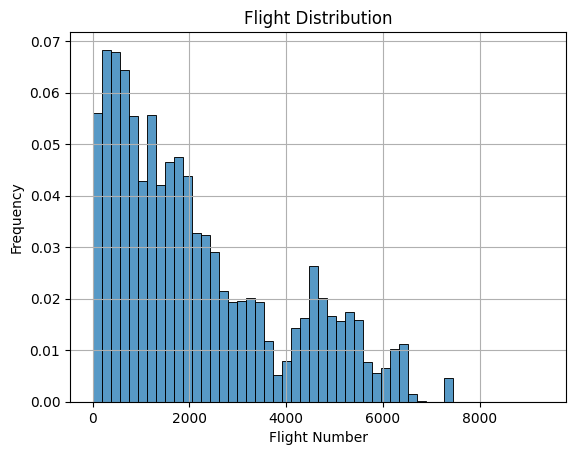

In [7]:
sns.histplot(data=flight_df, x="FLIGHT_NUMBER", bins=50, stat="probability")
plt.xlabel("Flight Number")
plt.ylabel("Frequency")
plt.title("Flight Distribution")
plt.grid()
plt.show()

Here we can see how the data repeats many times in the dataset, still, we data that appears in a much more frequent way than others. Specifically, we can see how data distributed in 50 bins do not constitute by itself more than the 10% of the dataset. This may tell us that this feature space is highly sparse and that by itself it cant create specific predictions (this is a conjecture on data). In order to determine if our hypothesis is true, further in this notebook we will see how data correlates to delayed flights. 

# Tail Number Distribution: 
As we said earlier, data needs to create patterns, as the Tail Number is the plane identifier. It is important for this considerations to know if the airplane id repeats in order to determine how the aircraft affects the delay in of the flight. 

In [8]:
tail_number_counts = flight_df['TAIL_NUMBER'].value_counts().sort_values(ascending=False)
top_50_tail_numbers = tail_number_counts.head(300)

Text(0, 0.5, 'Number of ocurrences')

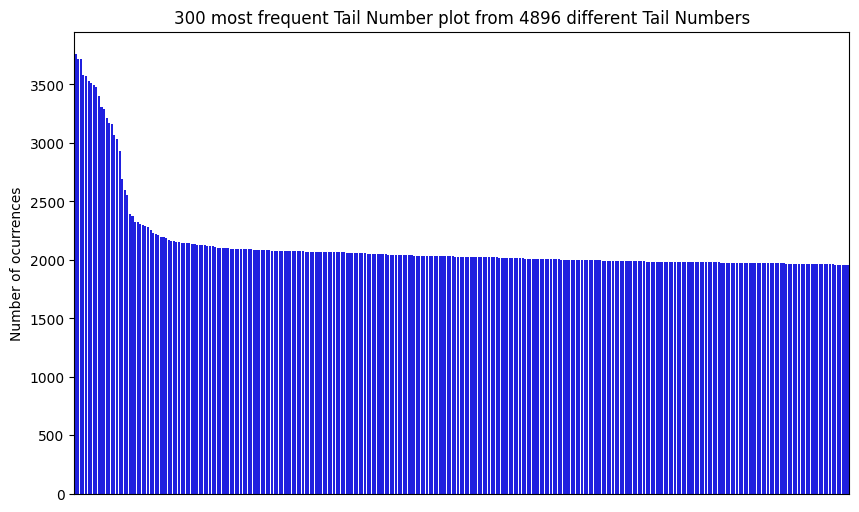

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_50_tail_numbers.index),y=list(top_50_tail_numbers.values), color="blue")
#_ = plt.xticks(rotation=90, ha="right")
#plt.grid()
plt.tick_params(axis='x', which="both", bottom=False, top=False, labelbottom=False)
plt.title(f"{len(top_50_tail_numbers)} most frequent Tail Number plot from {len(tail_number_counts.index)} different Tail Numbers")
plt.ylabel("Number of ocurrences")

In this data we can see how the amount of tail numbers is near 5000, we can also see how in the first 300 numbers the frequency stays constant. With this we can state that the use of this feature as categorically encoded data may harm the prediction model, as the use of one hot encoded features is not feasible for this amount of different tail numbers and the numerical encoding gives spacial similarities that may be artificial within data. 

## Analyzing country and location

ValueError: autodetected range of [nan, nan] is not finite

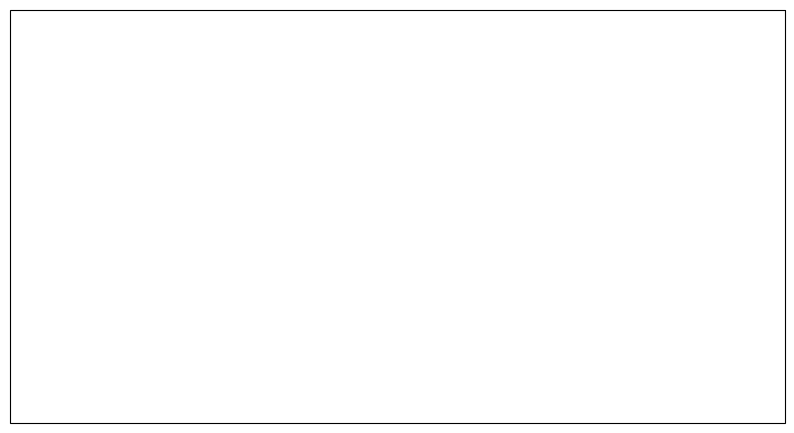

In [11]:
import cartopy.crs as ccrs
import cartopy
# Create a base map of the United States
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

# Plot the histogram on the map
ax.hist2d(flight_df['ORIGIN_AIRPORT_LONGITUDE'], flight_df['ORIGIN_AIRPORT_LATITUDE'], bins=50, cmap='Blues')

# Customize the appearance
ax.coastlines(resolution='10m', color='gray')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=0.5)
ax.set_title('Histogram of Data Points in the United States')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display or save the map histogram
plt.show()

## Analyzing Time features: 
In this section we will analyze the features that correspond to dates, times or months. In this particular case, the analyze of this factors help us see the time distributions and help us suggest the maintenance of this features through the final model. 

### Year:

In [27]:
flight_df["YEAR"].value_counts()

2015    5714008
Name: YEAR, dtype: int64

In this result we can see that the dataset only has information about the year 2015, so this feature is not relevant to the data analysis as it is kept constant throughout the whole dataset.

### Month:

In [28]:
import squarify
months = flight_df["MONTH"].value_counts()
total = sum(months)

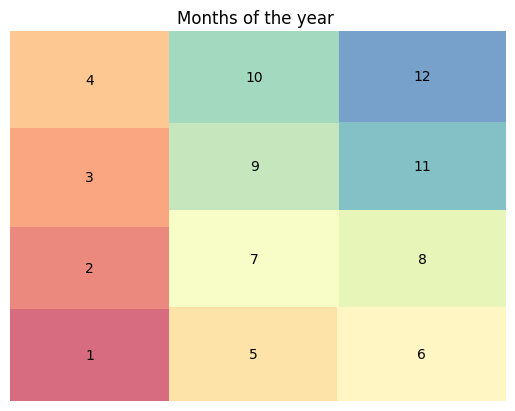

In [29]:
squarify.plot(months.sort_index(), label=range(1, 13), color=sns.color_palette("Spectral", 12), alpha=0.7, pad=2, norm_x=1, norm_y=1)
plt.axis("off")
plt.title("Months of the year ")
plt.show()

In this case the month distribution in the dataset is balanced. In particular we should see further how this balance is affected when the flight is or not delayed, in order to understand if the month is in fact an important feature to consider.  

In [30]:
time_of_day_fn = lambda x: "DAWN" if x<600 \
                                    else  "MORNING" if x<1200\
                                    else "NOON" if x<1400\
                                    else "AFTERNOON" if x<1800\
                                    else "EVENING" if x<2100\
                                    else "NIGHT"

In [31]:
flight_df["DEPARTURE_TIME_OF_DAY"] = flight_df["SCHEDULED_DEPARTURE"].apply(time_of_day_fn)
flight_df["ARRIVAL_TIME_OF_DAY"] = flight_df["SCHEDULED_ARRIVAL"].apply(time_of_day_fn)

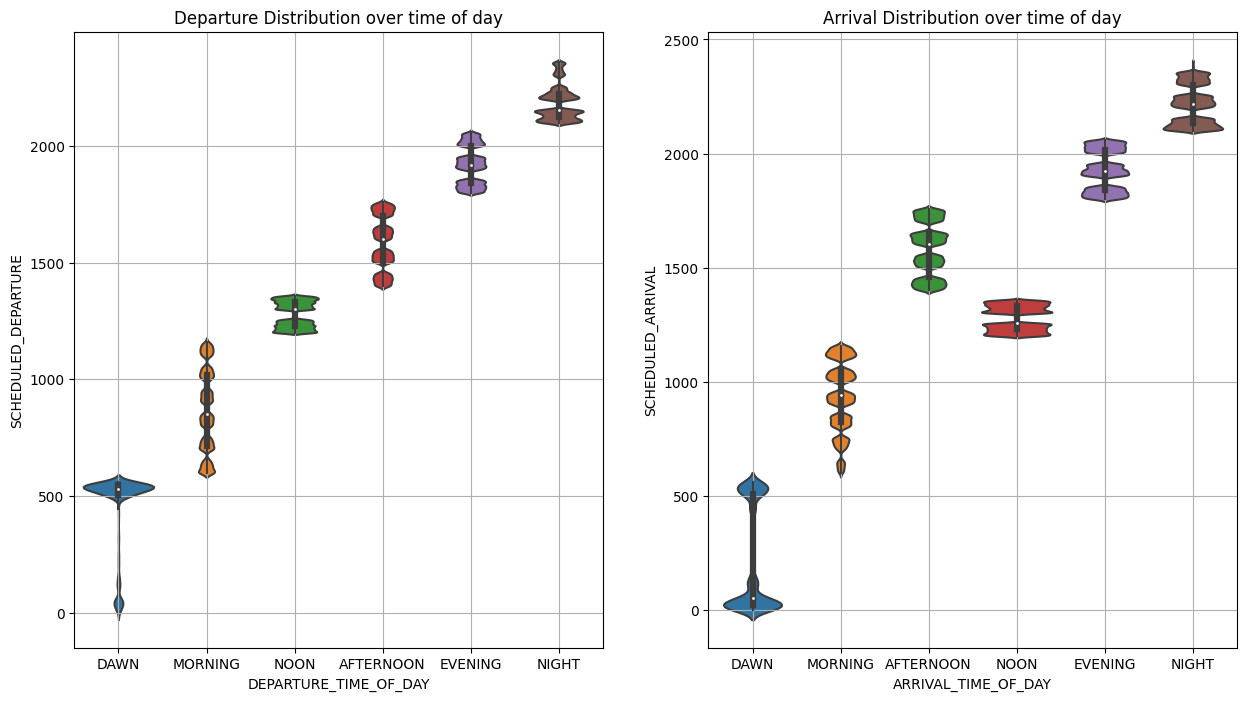

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
sns.violinplot(data=flight_df, x="DEPARTURE_TIME_OF_DAY", y="SCHEDULED_DEPARTURE" , ax=ax[0])
ax[0].set_title("Departure Distribution over time of day")
ax[0].grid()
sns.violinplot(data=flight_df, x="ARRIVAL_TIME_OF_DAY", y="SCHEDULED_ARRIVAL", ax=ax[1])
ax[1].set_title("Arrival Distribution over time of day")
ax[1].grid()

Throughout this two plots we can see that the distribution of departure and arrival at the different airports has different patterns depending on the time of day. For example, departure at Dawn has two picks a small one at 00:00 and a high one near 5:30 AM between those hours there is almost no flights.  We can also see that during morning, afternoon and evening the distribution of hours and flights is balanced, this means that there are no picks between this hours. At night, we can see that theres a pick near 21:00, after this pick, frequency of flights start to reduce. 

This patterns do not repeat through arrivals, as we can see at the plot in the right. At Dawn arrivals have a pick near 00:00 and 5:30 AM, even though the hours of picks are the same as in the departure plot, The picks are inverted. Observe that the distribution of of arrivals remains constant through the rest of the day, even at night in contrast to Departure flights. 

### Flight Distribution frequencies: 
Now, in order to correctly understand how the data is distributed we not only need to understand how the data is distributed in its own category, but also which categories are more predominant than others. This is why we are going to plot an histogram of the distribution of time of day that customers fly.  

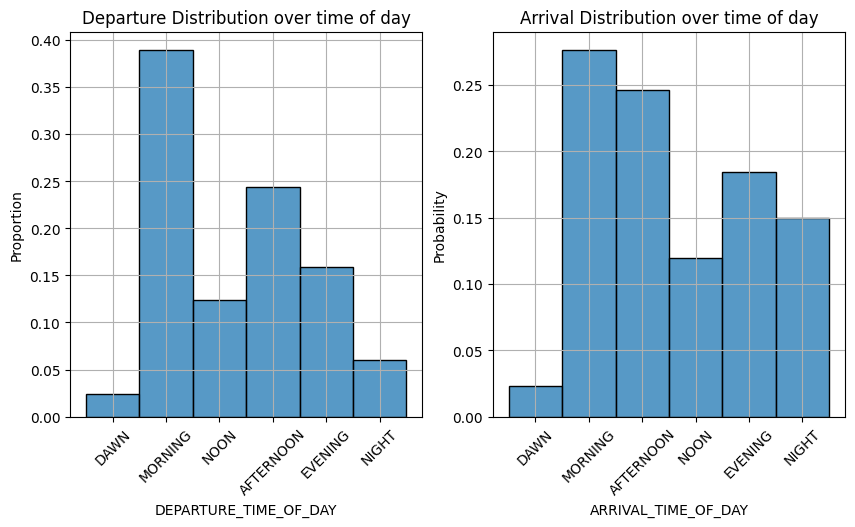

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=flight_df, x="DEPARTURE_TIME_OF_DAY" , ax=ax[0], stat="proportion")
ax[0].set_title("Departure Distribution over time of day")
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].grid()
sns.histplot(data=flight_df, x="ARRIVAL_TIME_OF_DAY", ax=ax[1], stat="probability")
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_title("Arrival Distribution over time of day")
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)
ax[1].grid()

Observe that both morning and afternoon are the most frequent time of day to fly. This shows clearly that this times of day are at least 10% greater than the next time of day that is evening. Its clear to note that the mode of departure and arrival are flipped, this could because people who departure at morning most probably will arrive at the afternoon, this way explaining how this values are exchanged. 

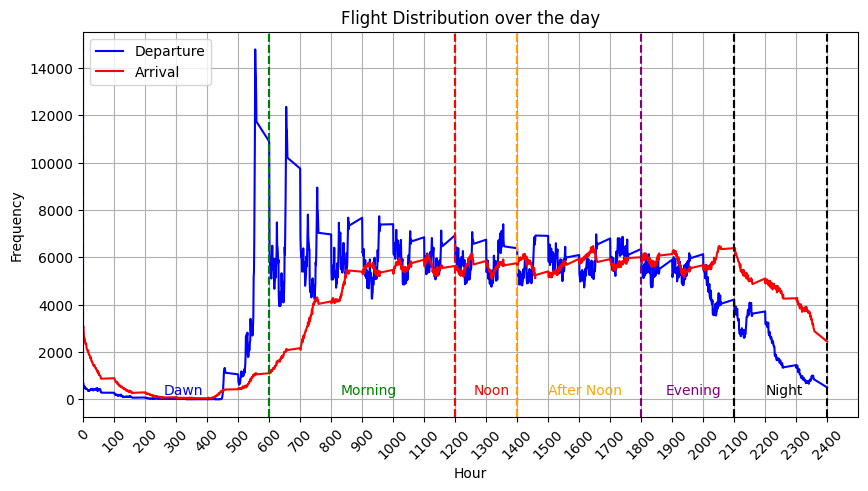

In [34]:
datetime_periods = {"Dawn": {"range": [0, 600], 
                             "color": "blue"},
                    "Morning": {"range": [600, 1200], 
                             "color": "green"},
                    "Noon": {"range": [1200, 1400], 
                             "color": "red"},
                    "After Noon": {"range": [1400, 1800], 
                             "color": "orange"},
                    "Evening": {"range": [1800, 2100], 
                             "color": "purple"},
                    "Night": {"range": [2100, 2400], 
                             "color": "black"}}

# Calculate the count of flights at each hour
flight_counts_departure = flight_df['DEPARTURE_TIME'].value_counts().sort_index()
flight_counts_arrival = flight_df['ARRIVAL_TIME'].value_counts().sort_index()


fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.lineplot(x=flight_counts_departure.index, y=flight_counts_departure.values, color='b', ax=ax, label="Departure")
sns.lineplot(x=flight_counts_arrival.index, y=flight_counts_arrival.values, color='r', ax=ax, label="Arrival")
ax.set_title("Flight Distribution over the day")
ax.set_xticks(np.arange(0, 2500, step=100))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlim([0, 2500])
ax.grid()

## label lines: 
for time_name, time_params in datetime_periods.items(): 
    color = time_params["color"]
    range_=  time_params["range"]
    mean_range = sum(range_)/2
    # # Add vertical lines to mark specific zones
    plt.axvline(range_[0], color=color, linestyle='--')
    plt.axvline(range_[1], color=color, linestyle='--')
    # Add labels for the zones
    plt.text(mean_range-10*len(time_name), 200, time_name, color=color)


plt.xlabel("Hour")
plt.ylabel("Frequency")
# Show the plot
plt.show()

In this plot, we can see how the amount of departures that ocurred between Dawn and morning generates a peak over the distribution of departures, In this case, after this peak near 5:30, the frequency of flights remains as a pulse during daytime and from 20 hrs forward starts decreasing. For the case of arrival hours they start to rise since 6 am till 10 am and then stay relatively constant during the rest of morning, noon, after noon and evening. In this case arrivals have a last pick at 21:00 pm to start decreasing till midnight where we have the initial spike.

# Analyzing Parts of flight: 
The total flight time is distributed in the following steps: 
<lo>
<li> Taxi Out</li>
<li>Air Time</li>
<li>Taxi in</li>
</lo>

In [46]:
selected_fields = ['TAXI_OUT', "AIR_TIME", "TAXI_IN"]

In [47]:
flight_df.loc[:, selected_fields]

,TAXI_OUT,AIR_TIME,TAXI_IN
0,21.0,169.0,4.0
1,12.0,263.0,4.0
2,16.0,266.0,11.0
3,15.0,258.0,8.0
4,11.0,199.0,5.0
...,...,...,...
5714003,22.0,272.0,4.0
5714004,17.0,195.0,3.0
5714005,17.0,197.0,8.0
5714006,10.0,144.0,3.0


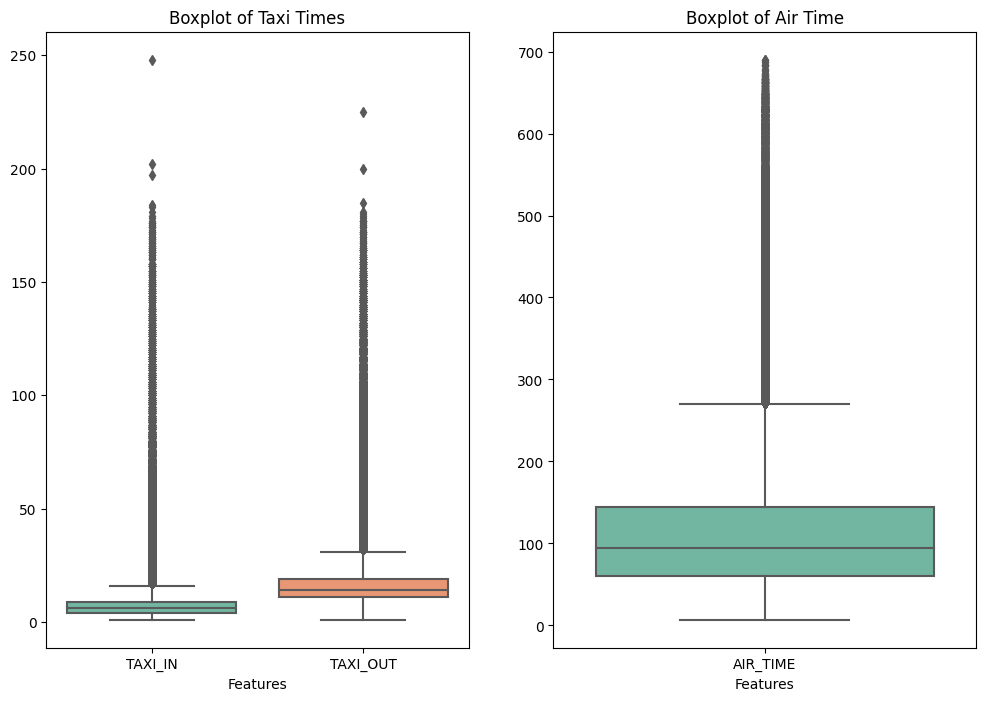

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
sns.boxplot(data=flight_df[["TAXI_IN", "TAXI_OUT"]], palette="Set2", ax=ax[0])
ax[0].set_title('Boxplot of Taxi Times')
ax[0].set_xlabel('Features')
sns.boxplot(data=flight_df[["AIR_TIME"]], palette="Set2", ax=ax[1])
ax[1].set_title('Boxplot of Air Time')
ax[1].set_xlabel('Features')
plt.show()

In [57]:
# Calculate mean and standard deviation for the selected fields
stats_df = flight_df[selected_fields].agg(['mean', 'std', "median"]).transpose()

# Format the mean ± standard deviation values
stats_df['mean ± std'] = stats_df['mean'].astype(str) + ' ± ' + stats_df['std'].astype(str)
stats_df["std_percentage"] = stats_df["std"]/stats_df["mean"]

# Display the resulting table
print(stats_df[['mean ± std', "std_percentage", "median"]])

                                     mean ± std  std_percentage  median
TAXI_OUT  16.06549763318497 ± 8.882448812899746        0.552890    14.0
AIR_TIME  113.51162809012519 ± 72.2308216203237        0.636330    94.0
TAXI_IN   7.429063452483791 ± 5.618951352866703        0.756347     6.0


As we can see, the variation of Taxi_In represents the biggest variation with respect to the mean of the feature. we can see this in both the boxplot with respect to the Taxi out variable or the table where we can see what percentage of the mean is the standard deviation worth. In this case we can see that in all cases this times suffer from outliers in data. Another posterior graph we are going to show is how this times change when they are separated by delays, because the appearance of outliers can be a sign of time delays in flights. 

# Flight Delay, Cancelation and Divertion: 

In [66]:
flight_df["CANCELLED"].value_counts()

0    5714008
Name: CANCELLED, dtype: int64

Here as we can see the flight cancellation only has 0 as a column, so its not important as a column to analyze, we will drop it later in the notebook.  

In [67]:
flight_df["DIVERTED"].value_counts()

0    5714008
Name: DIVERTED, dtype: int64

In the same way as Cancelled, the Diverted column only contains value 0. 

Text(0.5, 1.0, 'Flight Delay Arrival in minutes')

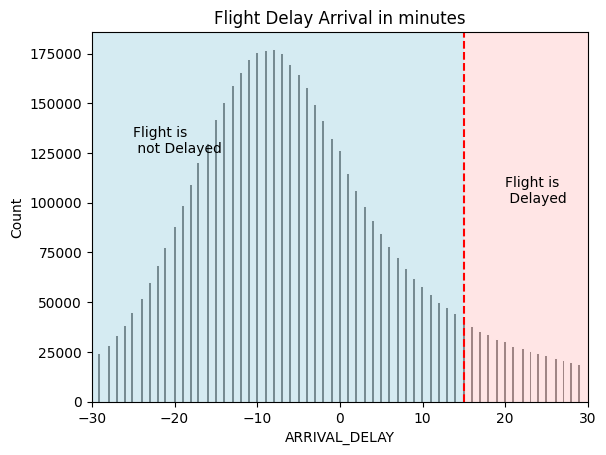

In [82]:
sns.histplot(data=flight_df, x="ARRIVAL_DELAY", color='k')
plt.axvline(15, color='red', linestyle='--')
# Add labels for the zones
plt.text(20, 100000, "Flight is\n Delayed", color="k")
plt.axvspan(15, 30, facecolor=(1.0, 0.8, 0.8), alpha=0.5)
plt.axvspan(-30, 15, facecolor='lightblue', alpha=0.5)
plt.text(-25, 125000, "Flight is\n not Delayed", color="k")
plt.xlim([-30, 30])
plt.title("Flight Delay Arrival in minutes")

In this case we can see that the flights inside USA have a time delay of -10 minutes, this means that flights tend to arrive earlier than expected to the airport. In order to predict delays we will create a binary variable called DELAYED. This variable will be 1 if the plane delayed more than 15 minutes and 0 otherwise. For this particular case we can see that the interested zone we are looking for is the red zone. As you can see in the previously displayed plot the delayed flights will be minimal within the dataset, this tells us two things, we can approach the problem as an classification problem where we try to detect if the flight is or not delayed or as a regression problem where we try to estimate the amount minutes the flight will be delayed. In this notebook we will approach both!

sns.histplot()